In [1]:
import pandas as pd
import pywt
import numpy as np
import os


In [10]:
# This code reads in a list of CSV files from the "./dataset" directory
# and processes them by cleaning up any string columns, converting the
# timestamp column to a numerical format, and saving the cleaned-up
# data to the "./processed" directory

datasets = os.listdir("./dataset")

for dataset in datasets:
    # Read in the CSV file
    df = pd.read_csv(f"./dataset/{dataset}", header=None, delimiter=" ")

    # Clean up any string columns by removing '[' and ']' characters
    for col in df.columns:
        if df[col].dtype == 'object':  # Check if column contains strings
            df[col] = df[col].str.replace(']', '')
            df[col] = df[col].str.replace('[', '')
        elif df[col].dtype == 'int64':  # Check if column contains integers
            raise ValueError("Cannot remove ']' from columns of integer type")

    # Drop the first column, which is not needed
    df = df.drop(columns=[0])

    # Rename the second and third columns to "timestamp" and "Value"
    df = df.rename(columns={1: 'timestamp', 2: 'Value'})

    # Convert the "timestamp" column to a timedelta format
    df['timestamp'] = pd.to_timedelta(df['timestamp'])

    # Convert the timedelta to seconds
    df['timestamp'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()

    # Remove any rows where the timestamp is equal to 0
    df = df[df['timestamp']//1 != 0]

    # Round the timestamp to the nearest 0.001 seconds
    df['timestamp'] = df['timestamp'].round(3)

    # Remove any duplicate rows
    # df = df.drop_duplicates(subset=['timestamp'])

    # Save the cleaned-up data to the "./processed" directory
    df.to_csv(f"./processed/{dataset}", index=False)

In [12]:
import pandas as pd
import numpy as np
import pywt
import os

# Function to apply ATAR algorithm for artifact removal
def artifact_removal(signal, threshold_mode='elimination', threshold_param=200, wavelet='db4', level=4):
    # Perform wavelet decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    
    # Apply ATAR algorithm
    thresholded_coeffs = []
    for i in range(len(coeffs)):
        # Apply thresholding based on the chosen mode
        if threshold_mode == 'elimination':
            thresholded_coeffs.append(np.where(np.abs(coeffs[i]) <= threshold_param, coeffs[i], 0))
        elif threshold_mode == 'linear_attenuation':
            thresholded_coeffs.append(np.where(np.abs(coeffs[i]) <= threshold_param, coeffs[i], 
                                                np.sign(coeffs[i]) * threshold_param * (1 - np.abs(coeffs[i]) / threshold_param)))
        elif threshold_mode == 'soft_thresholding':
            alpha = -1 / threshold_param * np.log(threshold_param / (np.max(np.abs(coeffs[i])) + 1e-8))
            thresholded_coeffs.append(np.where(np.abs(coeffs[i]) < threshold_param, coeffs[i], 
                                                np.sign(coeffs[i]) * (1 - np.exp(-alpha * np.abs(coeffs[i])))))
    
    # Reconstruct signal
    cleaned_signal = pywt.waverec(thresholded_coeffs, wavelet)
    
    # Ensure the output signal has the same length as the input signal
    cleaned_signal = cleaned_signal[:len(signal)]
    
    return cleaned_signal

datasets = os.listdir("./dataset")

for dataset in datasets:
    # Read in the CSV file
    df = pd.read_csv(f"./dataset/{dataset}", header=None, delimiter=" ")

    # Clean up any string columns by removing '[' and ']' characters
    for col in df.columns:
        if df[col].dtype == 'object':  # Check if column contains strings
            df[col] = df[col].str.replace(']', '')
            df[col] = df[col].str.replace('[', '')
        elif df[col].dtype == 'int64':  # Check if column contains integers
            raise ValueError("Cannot remove ']' from columns of integer type")

    # Drop the first column, which is not needed
    df = df.drop(columns=[0])
    # Rename the second and third columns to "timestamp" and "Value"
    df = df.rename(columns={1: 'timestamp', 2: 'Value'})

    # Convert the "timestamp" column to a timedelta format
    df['timestamp'] = pd.to_timedelta(df['timestamp'])

    # Convert the timedelta to seconds
    df['timestamp'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()

    # Remove any rows where the timestamp is equal to 0
    df = df[df['timestamp']//1 != 0]

    # Round the timestamp to the nearest 0.001 seconds
    df['timestamp'] = df['timestamp'].round(3)
    
    # Apply artifact removal to the 'Value' column
    print(dataset)
    df['Value'] = df['Value'].astype(float)

    assert df['Value'].dtype == np.float64, "Value column is not of float dtype after artifact removal"
    df['Value'] = artifact_removal(df['Value'])
    
    # Assert that the dtype of 'Value' column is float
    
    # Remove any duplicate rows
    # df = df.drop_duplicates(subset=['timestamp'])

    # Save the cleaned-up data to the "./processed" directory
    df.to_csv(f"./processed/{dataset}", index=False)


forwarda.csv
forwardaa.csv
forwardab.csv
forwardac.csv
forwardad.csv
forwardae.csv
forwardaf.csv
forwardag.csv
forwardah.csv
forwardai.csv
forwardaj.csv
forwardb.csv
forwardc.csv
forwarde.csv
forwardf.csv
forwardg.csv
forwardi.csv
forwardj.csv
forwardk.csv
forwardl.csv
forwardm.csv
forwardn.csv
forwardo.csv
forwardp.csv
forwardq.csv
forwardr.csv
forwards.csv
forwardt.csv
forwardv.csv
forwardw.csv
forwardx.csv
forwardy.csv
forwardz.csv
lefta.csv
leftaa.csv
leftab.csv
leftac.csv
leftad.csv
leftae.csv
leftaf.csv
leftag.csv
leftah.csv
leftai.csv
leftb.csv
leftc.csv
lefte.csv
leftf.csv
leftg.csv
lefti.csv
leftj.csv
leftk.csv
leftl.csv
leftm.csv
leftn.csv
lefto.csv
leftp.csv
leftq.csv
leftr.csv
lefts.csv
leftt.csv
leftv.csv
leftw.csv
leftx.csv
lefty.csv
leftz.csv
righta.csv
rightaa.csv
rightab.csv
rightac.csv
rightad.csv
rightae.csv
rightaf.csv
rightag.csv
rightah.csv
rightai.csv
rightaj.csv
rightb.csv
rightc.csv
righte.csv
rightf.csv
rightg.csv
righti.csv
rightj.csv
rightk.csv
rightl.csv
ri

In [19]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Generate random ages between 18 and 80 for 100 individuals
ages = np.random.randint(18, 81, size=100)

# Create a DataFrame
df = pd.DataFrame({'Age': ages})

# Display the DataFrame
print(df)
df =df.astype(float)
df.info()

    Age
0    56
1    69
2    46
3    32
4    60
..  ...
95   71
96   46
97   80
98   35
99   43

[100 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     100 non-null    float64
dtypes: float64(1)
memory usage: 928.0 bytes


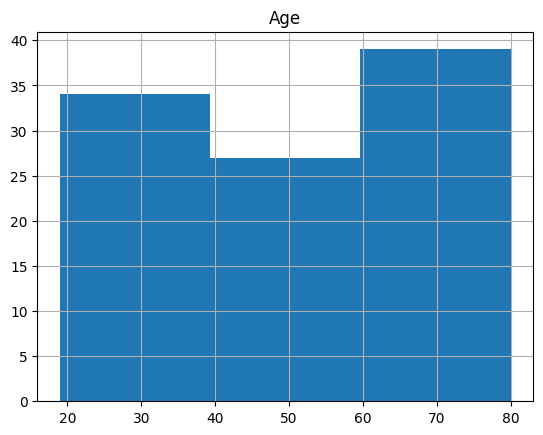

In [13]:
import matplotlib.pyplot as plt

df.hist(bins=3)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

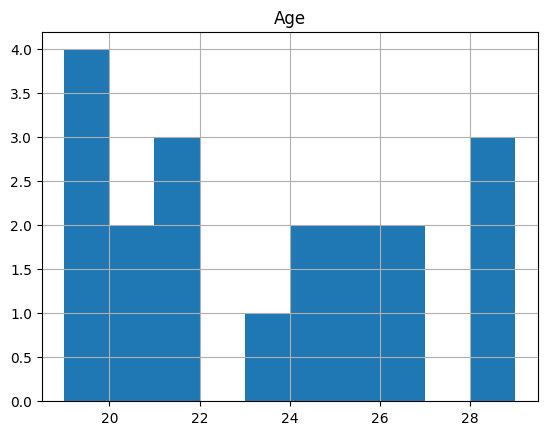

In [8]:
young = df[df<30]
young.hist()

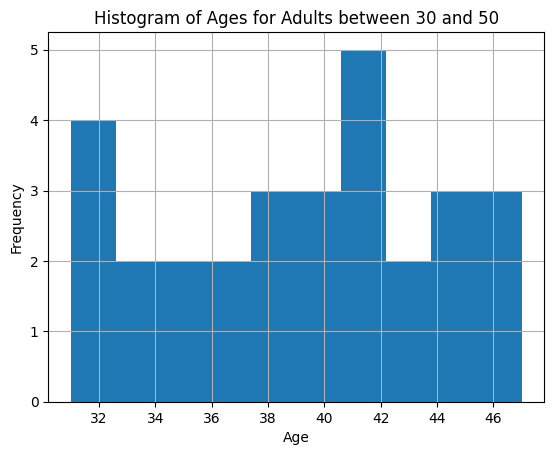

In [11]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only adults between 30 and 50
adult = df[(df['Age'] > 30) & (df['Age'] < 50)]

# Create a histogram
adult['Age'].hist()

# Display the histogram
plt.title('Histogram of Ages for Adults between 30 and 50')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
